# TPC 9 - Treino de Modelos

## Imports

In [37]:
from gensim.models import Word2Vec,  KeyedVectors 
import gensim
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Constantes

In [24]:
STOP_WORDS = set(stopwords.words('portuguese'))
STOP_WORDS.update(['entao', 'ate', 'lo', 'la', 'lhe', 'lhes', 'ja', 'aqui', 'ali', 
                   'disse', 'pode', 'tao' 'tambem', 'voce', 'ter'])



VECTOR_SIZE = 300
WINDOW_SIZE = 5
MIN_WORD_COUNT = 3
ALGORITHM = 1
EPOCHS = 20
NUM_WORKERS = 3

FILE1_PATH = "text\Harry_Potter_Camara_Secreta-br.txt"
FILE2_PATH = "text\Harry_Potter_e_A_Pedra_Filosofal.txt"
MODEL_SAVE_PATH = "harry.model"

## Load Files

In [25]:
def load_and_preprocess_text(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        sentences = []
        for line in text.splitlines():

            tokens = list(gensim.utils.tokenize(line, lowercase=True, deacc=True, encoding='utf-8'))
            

            filtered_tokens = [word for word in tokens if word not in STOP_WORDS]
            
  
            if filtered_tokens:
                sentences.append(filtered_tokens)
        
        return sentences
    except FileNotFoundError:
        print(f"Erro: Ficheiro não encontrado em {file_path}")
        return []
    except Exception as e:
        print(f"Erro ao processar {file_path}: {str(e)}")
        return []

## Train Model

In [26]:
def train():
    print("A carregar e pré-processar ficheiros de texto...")
    sentences1 = load_and_preprocess_text(FILE1_PATH)
    sentences2 = load_and_preprocess_text(FILE2_PATH)
     
    all_sentences = sentences1 + sentences2
    
    if not all_sentences:
        print("Erro: Nenhuma frase foi carregada. Verifique os caminhos dos ficheiros.")
        return
    
    print("A treinar o modelo Word2Vec...")
    model = Word2Vec(sentences=all_sentences, 
                     vector_size=VECTOR_SIZE, 
                     window=WINDOW_SIZE, 
                     min_count=MIN_WORD_COUNT, 
                     sg=ALGORITHM, 
                     epochs=EPOCHS, 
                     workers=NUM_WORKERS)
    

    vectors_path = MODEL_SAVE_PATH 
    model.wv.save_word2vec_format(vectors_path, binary=False)
    print(f"Vetores guardados em formato word2vec em {vectors_path}")


train()

A carregar e pré-processar ficheiros de texto...
A treinar o modelo Word2Vec...
Vetores guardados em formato word2vec em harry.model


## Test Model

In [28]:
def load_model(model_path):
    try:
        model = KeyedVectors.load_word2vec_format(model_path, binary=False)
        return model
    except FileNotFoundError:
        print(f"Erro: Modelo não encontrado em {model_path}")
        return None
    except Exception as e:
        print(f"Erro ao carregar o modelo: {str(e)}")
        return None    
    

def get_word_vector(model, word):
    try:
        return model[word]
    except KeyError:
        print(f"Palavra '{word}' não está no vocabulário.")
        return None



model = load_model(MODEL_SAVE_PATH)


if model is None:
    print("ERRO: Modelo não foi carregado. Testes não podem ser executados.")
else:
     print(f"Tamanho do vocabulário: {len(model)}")

Tamanho do vocabulário: 4739


### Vetores de palavras principais

In [ ]:
if model:
    print("\n--- Vetores de palavras principais ---")
    words_to_check = ["harry", "dumbledore", "hogwarts", "magia", "grifinoria"]
    for word in words_to_check:
        vector = get_word_vector(model, word)
        if vector is not None:
            print(f"Dimensão do vetor '{word}': {len(vector)}")
            print(f"Vetor da palavra '{word}': {vector[:10]}...")

else:
    print("Modelo não carregado, impossível executar teste.")


--- Vetores de palavras principais ---
Dimensão do vetor 'harry': 300
Vetor da palavra 'harry': [ 0.09122682  0.08999351  0.12824899  0.26136598 -0.06878404 -0.3724339
  0.0852555   0.430078   -0.06303241 -0.08694255]...
Dimensão do vetor 'dumbledore': 300
Vetor da palavra 'dumbledore': [ 0.0938527   0.2978253  -0.20516919  0.02677412 -0.08742801  0.12149491
  0.10787585  0.41641706  0.40608186 -0.15676501]...
Dimensão do vetor 'hogwarts': 300
Vetor da palavra 'hogwarts': [ 0.30489483  0.4606859  -0.16613    -0.00090596 -0.20421539 -0.3394063
  0.17863458  0.14959995  0.15870622  0.05653721]...
Dimensão do vetor 'magia': 300
Vetor da palavra 'magia': [ 0.13441874  0.2963897  -0.19504249  0.04339765  0.06016991 -0.13706338
  0.37710825  0.46386456  0.05911545 -0.30745783]...
Dimensão do vetor 'grifinoria': 300
Vetor da palavra 'grifinoria': [-0.3513932  -0.08217485 -0.28650957  0.1750071  -0.19521298 -0.0425717
  0.15594406  0.55347496  0.3695693  -0.30997315]...


### Palavras similares

In [31]:
if model: 
    print("\n--- Palavras similares ---")
    words_for_similarity = ["harry", "hogwarts", "dumbledore", "hermione", "rony", "cicatriz", "quadribol", "varinha", "snape", "sonserina", "grifinoria"]
    for word in words_for_similarity:
        try:
            print(f"\nSimilares a '{word}':")
            similar = model.most_similar(word, topn=5)
            print(similar)
        except KeyError:
            print(f"Palavra '{word}' não está no vocabulário.")
else:
    print("Modelo não carregado, impossível executar teste.")


--- Palavras similares ---

Similares a 'harry':
[('cartao', 0.5796537399291992), ('horario', 0.5727582573890686), ('automaticamente', 0.5661267638206482), ('desesperado', 0.565894365310669), ('distinguir', 0.5638467073440552)]

Similares a 'hogwarts':
[('expresso', 0.6929485201835632), ('bruxaria', 0.6307135820388794), ('servicos', 0.6222922205924988), ('escola', 0.621100902557373), ('estudar', 0.6161048412322998)]

Similares a 'dumbledore':
[('binns', 0.6345553994178772), ('dippet', 0.5736896991729736), ('pedi', 0.5620558261871338), ('alvo', 0.5504888892173767), ('gaguejou', 0.5335317850112915)]

Similares a 'hermione':
[('mostrando', 0.5083152651786804), ('mione', 0.5041040182113647), ('autorizacao', 0.4988630712032318), ('amiga', 0.496390163898468), ('continua', 0.494624525308609)]

Similares a 'rony':
[('urgencia', 0.5340894460678101), ('desconfiada', 0.5201237797737122), ('recolhendo', 0.5184688568115234), ('intrigado', 0.5138868093490601), ('hesitante', 0.5114798545837402)]

Si

### Similaridade entre pares de palavras

In [32]:
if model:
    print("\n--- Similaridade entre pares de palavras ---")
    pairs_to_compare = [
        ('harry', 'potter'),
        ('harry', 'hermione'),
        ('harry', 'rony'),
        ('dumbledore', 'voldemort'),
        ('hogwarts', 'escola'),
        ('grifinoria', 'sonserina'),
        ('magia', 'varinha'),
        ('snape', 'pocoes'),
        ('quadribol', 'vassoura'),
        ('harry', 'cicatriz')
    ]

    for s1, s2 in pairs_to_compare:
        try:
            similarity = model.similarity(s1, s2)
            print(f'{s1} \t {s2} \t {similarity:.2f}')
        except KeyError:
            print(f"Não foi possível calcular similaridade: '{s1}' ou '{s2}' não está no vocabulário.")
else:
    print("Modelo não carregado, impossível executar teste.")


--- Similaridade entre pares de palavras ---
harry 	 potter 	 0.08
harry 	 hermione 	 0.29
harry 	 rony 	 0.40
dumbledore 	 voldemort 	 0.35
hogwarts 	 escola 	 0.62
grifinoria 	 sonserina 	 0.62
magia 	 varinha 	 0.16
snape 	 pocoes 	 0.54
quadribol 	 vassoura 	 0.47
harry 	 cicatriz 	 0.36


### Analogias

In [33]:
if model: 
    print("\n--- Teste de analogias ---")
    try:
        result = model.most_similar(positive=['draco', 'grifinoria'], negative=['sonserina'], topn=3)
        print(f"draco - sonserina + grifinoria = {result}")
    except KeyError as e:
        print(f"Não foi possível testar analogia 1: Palavra(s) {e} não encontrada(s) no vocabulário.")
    except Exception as e:
         print(f"Erro inesperado na analogia 1: {e}")

    try:
        result = model.most_similar(positive=['hermione', 'espada'], negative=['livro'], topn=3)
        print(f"hermione - livro + espada = {result}")
    except KeyError as e:
        print(f"Não foi possível testar analogia 2: Palavra(s) {e} não encontrada(s) no vocabulário.")
    except Exception as e:
         print(f"Erro inesperado na analogia 2: {e}")
else:
    print("Modelo não carregado, impossível executar teste.")


--- Teste de analogias ---
draco - sonserina + grifinoria = [('neville', 0.47226062417030334), ('acabado', 0.4226175546646118), ('tapado', 0.4130967855453491)]
hermione - livro + espada = [('tremendo', 0.6045465469360352), ('robe', 0.5788584351539612), ('tonto', 0.5645690560340881)]


### Estatísticas dos vetores

In [40]:
if model: #
    print("\n--- Estatísticas dos vetores (Frequência) ---")
    try:
        top_n = 10
        print(f"Os {top_n} termos mais frequentes no vocabulário (se a contagem estiver disponível):")
        word_freqs = {word: model.get_vecattr(word, "count") for word in model.index_to_key[:1000]} # Limit check for performance
        sorted_words = sorted(word_freqs.items(), key=lambda x: x[1], reverse=True)
        for word, freq in sorted_words[:top_n]:
            print(f"{word}: {freq}")
    except AttributeError:
         print("Atributo 'count' não disponível nos vetores carregados (pode ser necessário salvar o modelo completo).")
    except Exception as e:
        print(f"Não foi possível calcular estatísticas dos vetores: {e}")
else:
    print("Modelo não carregado, impossível executar teste.")


--- Estatísticas dos vetores (Frequência) ---
Os 10 termos mais frequentes no vocabulário (se a contagem estiver disponível):
harry: 4739
nao: 4738
rony: 4737
hagrid: 4736
coisa: 4735
hermione: 4734
bem: 4733
cabeca: 4732
olhos: 4731
dumbledore: 4730



--- Visualização PCA das 10 palavras mais frequentes ---


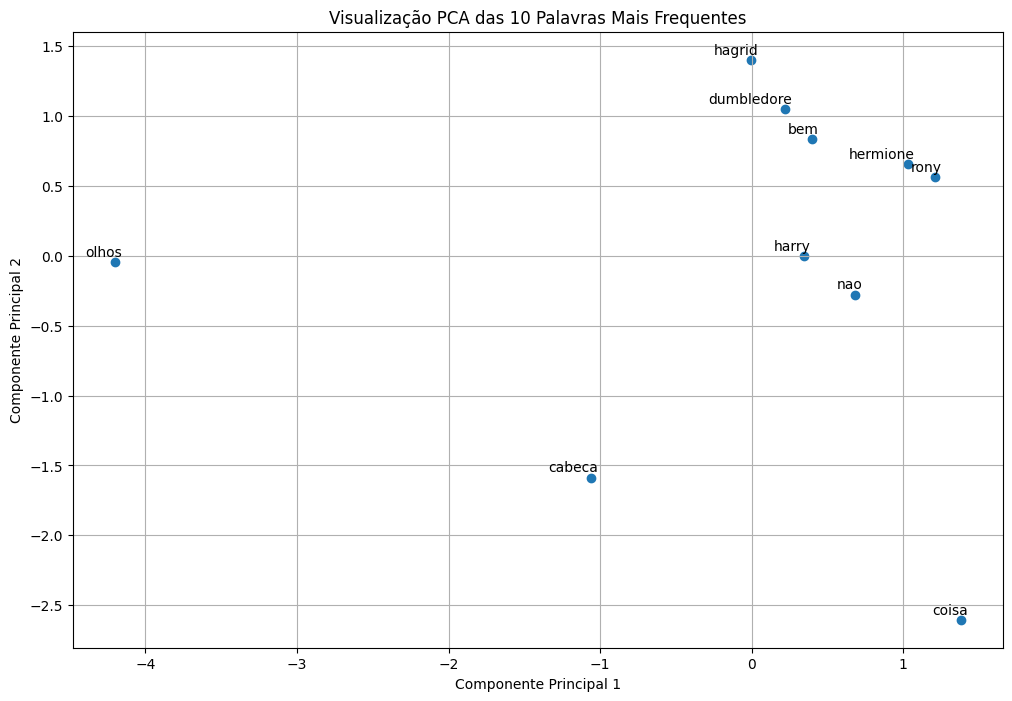

In [42]:
if model: 
    print("\n--- Visualização PCA das 10 palavras mais frequentes ---")
    try:

        top_words = model.index_to_key[:10]
        top_vectors = [model[word] for word in top_words]
        
        pca = PCA(n_components=2)
        result = pca.fit_transform(top_vectors)
        
        plt.figure(figsize=(12, 8))
        plt.scatter(result[:, 0], result[:, 1])
        
        for i, word in enumerate(top_words):
            plt.annotate(word, xy=(result[i, 0], result[i, 1]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom')
                         
        plt.title("Visualização PCA das 10 Palavras Mais Frequentes")
        plt.xlabel("Componente Principal 1")
        plt.ylabel("Componente Principal 2")
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Não foi possível gerar o gráfico PCA: {e}")
else:
    print("Modelo não carregado, impossível gerar gráfico.")
